<h1>Sistema de alquiler de bicicletas en Seúl</h1>

<h1>Introducción</h1>
Seúl es una ciudad vibrante y moderna que combina la rica herencia cultural de Corea del Sur con la tecnología de vanguardia y la arquitectura contemporánea. Rodeada por montañas y cruzada por el río Han, Seúl es una metrópolis donde lo tradicional y lo futurista se entrelazan de manera única. Sus bulliciosos mercados, antiguos palacios y templos se encuentran a poca distancia de rascacielos relucientes y centros comerciales de última generación. La ciudad es conocida por su gastronomía diversa, que abarca desde platos callejeros hasta alta cocina, y su sistema de transporte eficiente que conecta sus distintivos barrios.

El sistema de transporte público de la ciudad incluye una extensa red de metro y autobuses que conecta prácticamente todos los rincones, facilitando los desplazamientos tanto para los residentes como para los visitantes. Buscando una una opción ecológica y versátil para la movilidad urbana, Seúl ha desarrollado un sistema de alquiler de bicicletas conocido como Ttareungyi.

La ciudad ha contratado un equipo consultor para entender mejor cómo se utilizan las bicicletas en la ciudad y cómo se pueden optimizar los servicios.  La parte crucial consiste en predecir la cantidad de bicicletas necesarias en cada hora para mantener un suministro estable de bicicletas de alquiler.


<h1>Conjunto de datos</h1>

El conjunto de datos contiene información meteorológica (temperatura, humedad, velocidad del viento, visibilidad, punto de rocío, radiación solar, nevadas, precipitaciones), el número de bicicletas alquiladas por hora e información sobre la fecha.

Los datos se pueden descargar desde este link. Este conjunto de dato es una traducción de Seoul Bike Sharing Demand (2020).


In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<h1>Análisis exploratorio de datos</h1>

In [80]:
data_url = 'SeoulBikeData.csv'
df = pd.read_csv(data_url, encoding='unicode_escape')
print(df.shape)
df.head()

(8760, 16)


,Unnamed: 0,Fecha,Bicicletasalquiladas,Hora,Temperatura(C),Humedad(%),Velocidaddelviento(m/s),Visibilidad(10 m),Temperaturadelpuntoderocio(C),Radiacionsolar(MJ/m2),Precipitaciones(mm),nevadas(cm),Estaciondelano,Diafestivo,Diaderenta,AltaDemanda
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Invierno,No,Si,0
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Invierno,No,Si,0
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Invierno,No,Si,0
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Invierno,No,Si,0
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Invierno,No,Si,0


In [81]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     8760 non-null   int64  
 1   Fecha                          8760 non-null   object 
 2   Bicicletasalquiladas           8760 non-null   int64  
 3   Hora                           8760 non-null   int64  
 4   Temperatura(C)                 8760 non-null   float64
 5   Humedad(%)                     8760 non-null   int64  
 6   Velocidaddelviento(m/s)        8760 non-null   float64
 7   Visibilidad(10 m)              8760 non-null   int64  
 8   Temperaturadelpuntoderocio(C)  8760 non-null   float64
 9   Radiacionsolar(MJ/m2)          8760 non-null   float64
 10  Precipitaciones(mm)            8760 non-null   float64
 11  nevadas(cm)                    8760 non-null   float64
 12  Estaciondelano                 8760 non-null   o

In [82]:
df.columns

Index(['Unnamed: 0', 'Fecha', 'Bicicletasalquiladas', 'Hora', 'Temperatura(C)',
       'Humedad(%)', 'Velocidaddelviento(m/s)', 'Visibilidad(10 m)',
       'Temperaturadelpuntoderocio(C)', 'Radiacionsolar(MJ/m2)',
       'Precipitaciones(mm)', 'nevadas(cm)', 'Estaciondelano', 'Diafestivo',
       'Diaderenta', 'AltaDemanda'],
      dtype='object')

El sistema de alquiler de bicicletas en Seúl suele operar todo el año, proporcionando acceso a bicicletas en múltiples estaciones repartidas por toda la ciudad. El alquiler de bicicletas en Seúl no se limita a una temporada específica.

Podemos observar como aumenta la cantidad de bicicletas alquilada con el aumento de la temperatura y podremos observar una linealidad entre estas dos variables. 

<AxesSubplot:xlabel='Temperatura(C)', ylabel='Bicicletasalquiladas'>

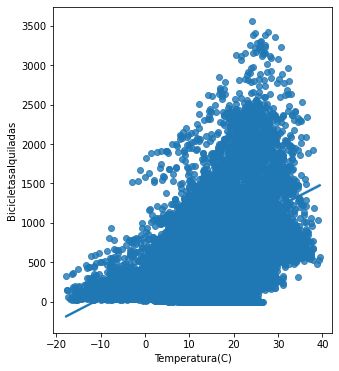

In [83]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x='Temperatura(C)', y='Bicicletasalquiladas', data=df, ax=ax)

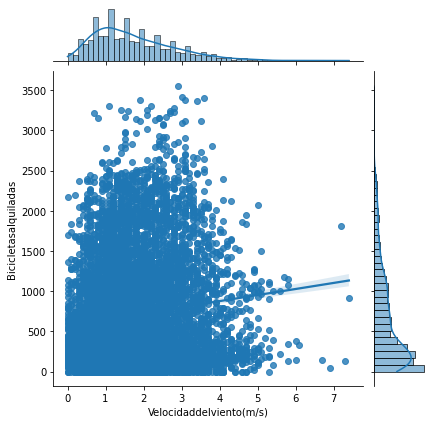

In [84]:
sns.jointplot(x='Velocidaddelviento(m/s)', y='Bicicletasalquiladas', data=df, kind="reg")

Podemos observar la correlación que existe entre las variables Bicicletas alquiladas,  Hora, Temperatura (C), Humedad (%), Velocidad del viento (m/s), Visibilidad (10 m),  Temperatura del punto de rocÃ­o (C), RadiaciÃ³n solar (MJ/m2), Precipitaciones (mm) y  nevadas (cm). Esta gráfica nos permite visualizar y analizar la relación entre todas las variables. Si las variables tienden a moverse juntas en la misma dirección, hay una correlación positiva, mientras que si se mueven en direcciones opuestas, hay una correlación negativa. Cuanto más cercana esté la relación a una línea recta, más fuerte será la correlación. Si los puntos en la gráfica están dispersos al azar y no siguen ningún patrón aparente, esto sugiere que no hay una correlación significativa entre las variables. Además de las correlaciones lineales, las gráficas de correlación también pueden mostrar patrones no lineales.


In [86]:
df[['Hora', 'Temperatura(C)',
       'Humedad(%)', 'Velocidaddelviento(m/s)', 'Visibilidad(10 m)',
       'Temperaturadelpuntoderocio(C)', 'Radiacionsolar(MJ/m2)',
       'Precipitaciones(mm)', 'nevadas(cm)']].corr

<bound method DataFrame.corr of       Hora  Temperatura(C)  Humedad(%)  Velocidaddelviento(m/s)  \
0        0            -5.2          37                      2.2   
1        1            -5.5          38                      0.8   
2        2            -6.0          39                      1.0   
3        3            -6.2          40                      0.9   
4        4            -6.0          36                      2.3   
...    ...             ...         ...                      ...   
8755    19             4.2          34                      2.6   
8756    20             3.4          37                      2.3   
8757    21             2.6          39                      0.3   
8758    22             2.1          41                      1.0   
8759    23             1.9          43                      1.3   

      Visibilidad(10 m)  Temperaturadelpuntoderocio(C)  Radiacionsolar(MJ/m2)  \
0                  2000                          -17.6                    0.0   
1

La correlación de variables es de gran importancia ya que nos permite comprender cómo dos o más variables se relacionan entre sí. La identificación de relaciones entre variables puede ayudarnos a predecir comportamientos futuros, identificar factores clave que afectan un resultado y, en última instancia, tomar medidas para mejorar o controlar situaciones. La correlación también es fundamental en la detección de posibles causas y efectos. Entre mas cerca a 1 el valor de correlación, mayor es la correlación entre las variables.


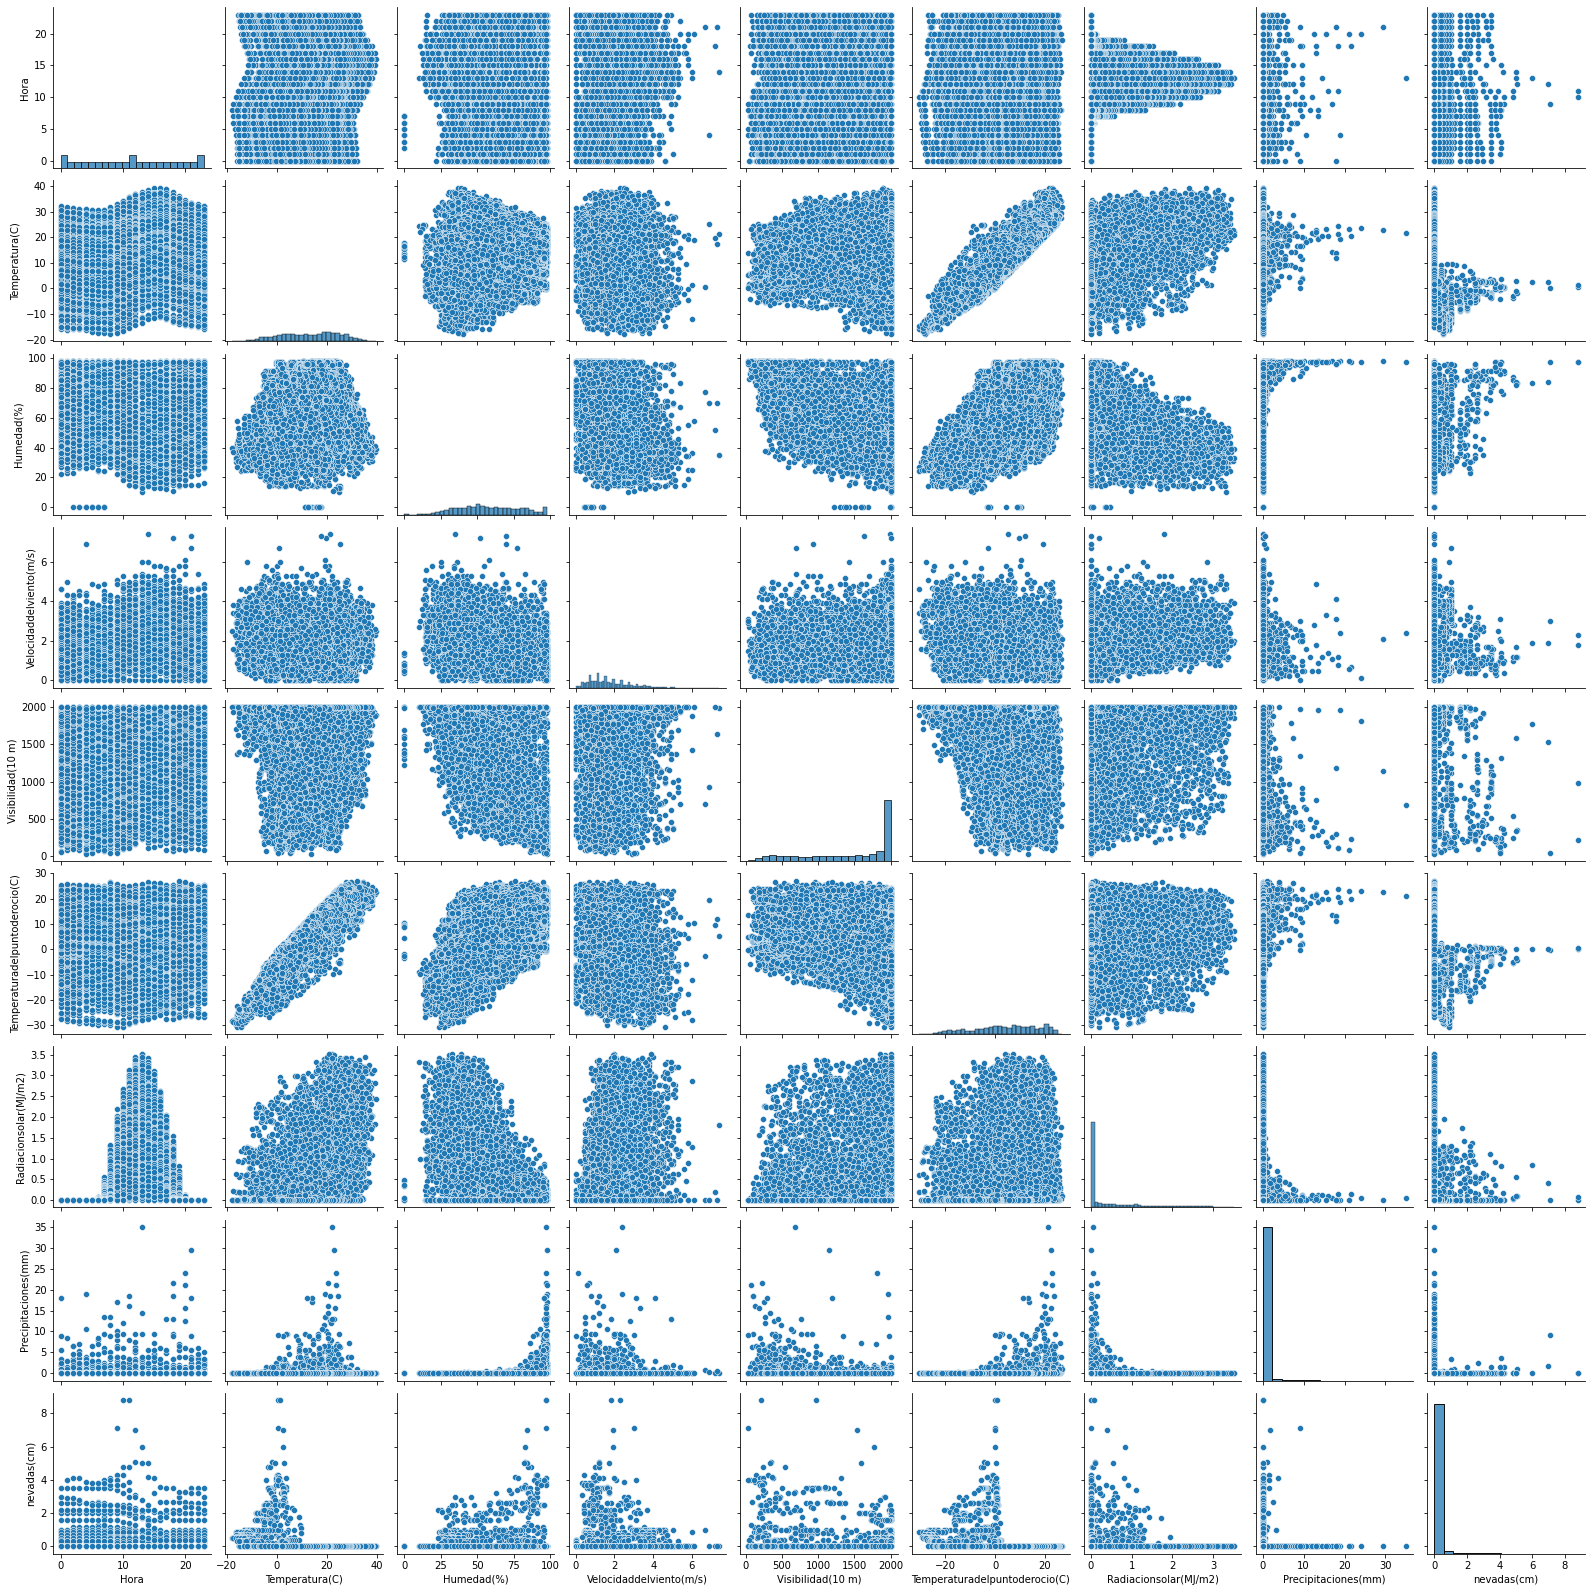

In [87]:
sns.pairplot(df[['Hora', 'Temperatura(C)',
       'Humedad(%)', 'Velocidaddelviento(m/s)', 'Visibilidad(10 m)',
       'Temperaturadelpuntoderocio(C)', 'Radiacionsolar(MJ/m2)',
       'Precipitaciones(mm)', 'nevadas(cm)']])
plt.show()

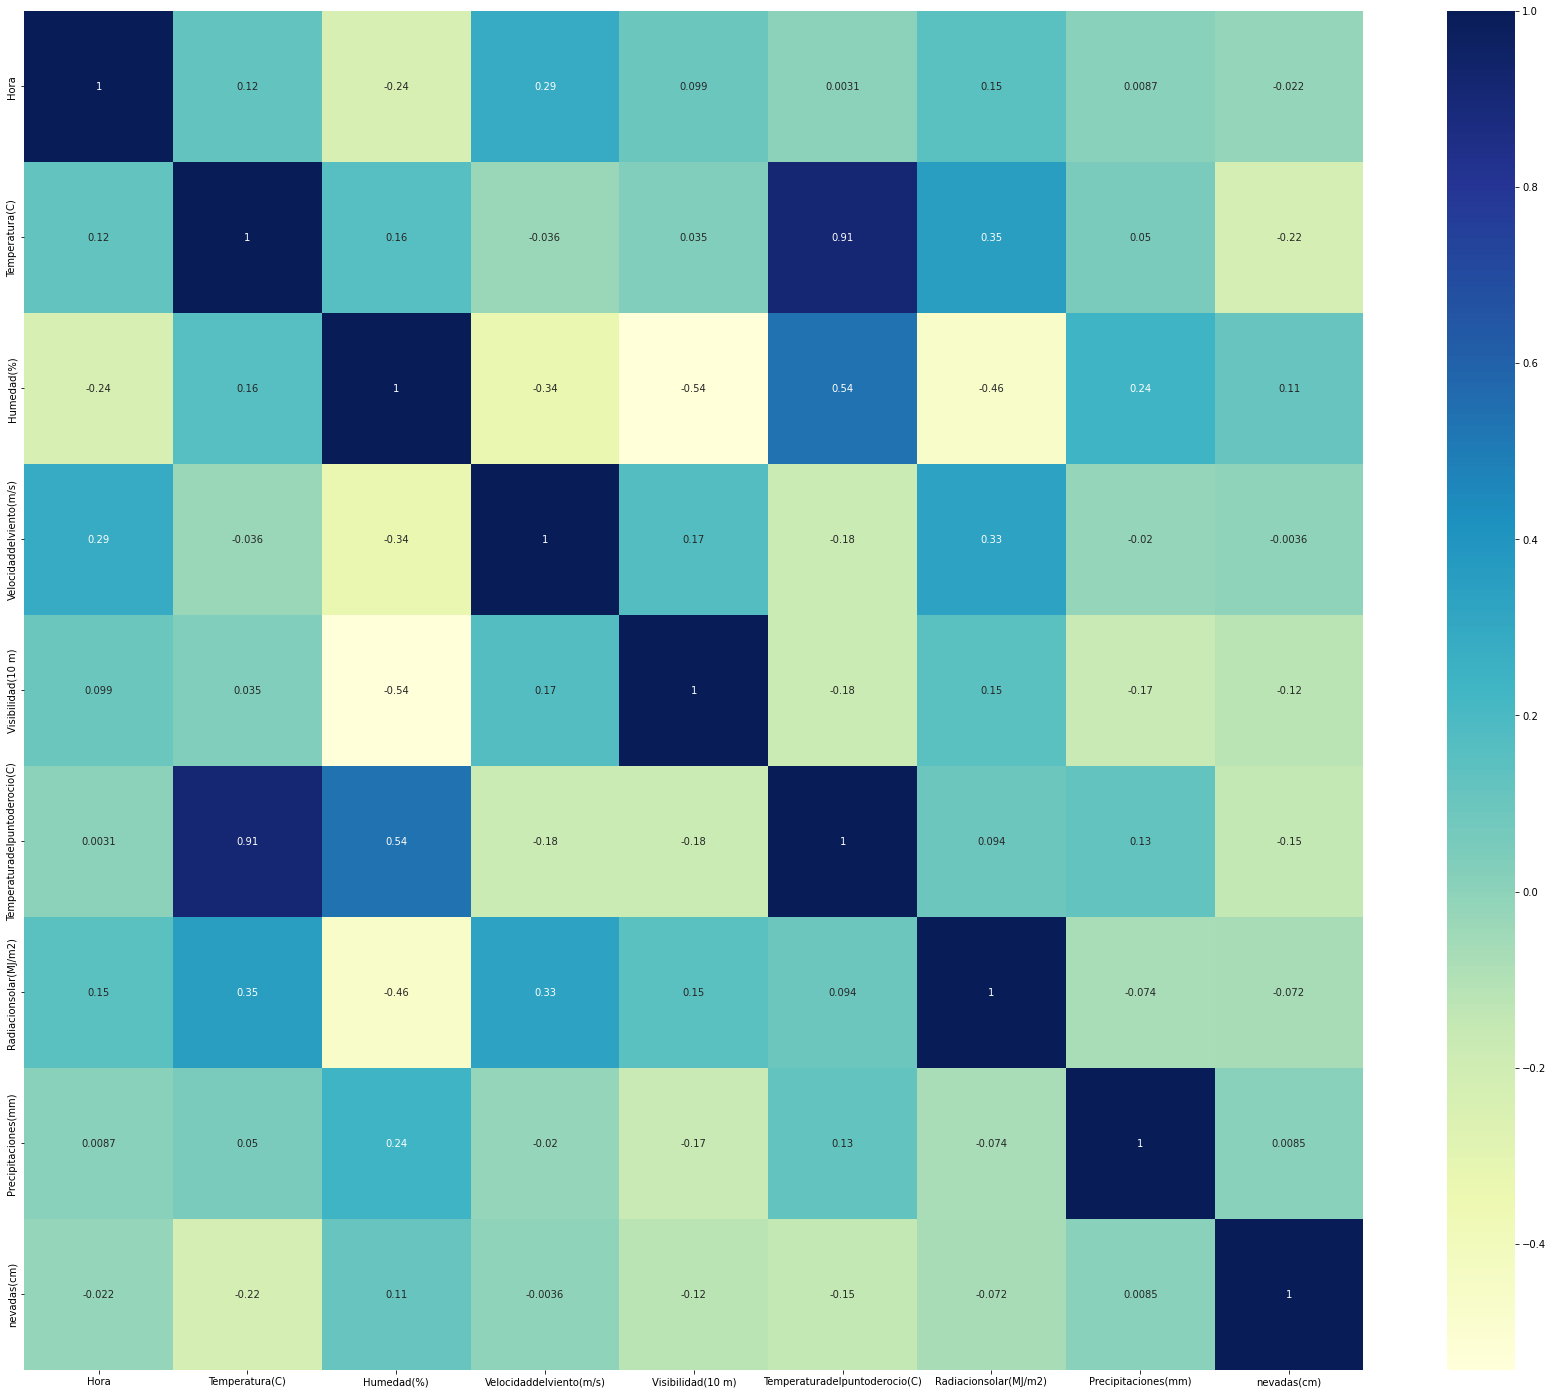

In [88]:
plt.figure(figsize = (30, 25))
sns.heatmap(df[['Hora', 'Temperatura(C)',
       'Humedad(%)', 'Velocidaddelviento(m/s)', 'Visibilidad(10 m)',
       'Temperaturadelpuntoderocio(C)', 'Radiacionsolar(MJ/m2)',
       'Precipitaciones(mm)', 'nevadas(cm)']].corr(), annot = True, cmap="YlGnBu")
plt.show()

<h1>Construcción e implementación de modelo de regresión logística</h1>
Iniciamos con el entrenamiento de un modelo de regresión lineal utilizando la libreria sklearn. El primer paso es separar los datos en dos partes. Los datos de entrenamiento y los datos de pruebas. Para esto utilizamos train_test_split de la libreria sklearn.model_selection.

Los datos originales los separamos de forma aleatoria, donde el 75% de los datos los vamos a utilizar para entrenar el modelo y el resto para probar la eficiencia del modelo. Podmeos observar que para el entrenamiento tenemos 6,570 observaciones y 2,190 observaciones para las pruebas.

In [89]:
from sklearn.model_selection import train_test_split

X = df[['Hora', 'Temperatura(C)',
       'Humedad(%)', 'Velocidaddelviento(m/s)', 'Visibilidad(10 m)',
       'Temperaturadelpuntoderocio(C)', 'Radiacionsolar(MJ/m2)',
       'Precipitaciones(mm)', 'nevadas(cm)']] # Independet variable
y = df['Bicicletasalquiladas'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=23)

print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)


(6570,) (6570, 9)
(2190,) (2190, 9)


<h2>Modelo de regresión lineal multi-variable</h2>

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg_mult = LinearRegression()
lin_reg_mult.fit(X_test,  y_test)
print(lin_reg_mult.intercept_, lin_reg_mult.coef_)

451.1070833652659 [ 2.85377855e+01  2.34991066e+01 -7.80856924e+00  1.49824980e+01
  5.14932064e-02  7.21596809e+00 -7.08209798e+01 -6.47752945e+01
  1.82763440e+01]


Podemos apreciar los valores de la intercepción y del coeficiente. Para medir el rendimineto del modelo vamos a predecir la cantidad de bicicletas alquiladas.

In [91]:
from sklearn.metrics import mean_squared_error

y_pred_ml = lin_reg_mult.predict(X_test)

J_mse_sk = mean_squared_error(y_pred_ml, y_test)

# R_square
R_square_ml = lin_reg_mult.score(X_test,y_test)

print('El valor de MSE es: ',J_mse_sk)
print('El R^2 obtenido por scikit learn es :',R_square_ml)

El valor de MSE es:  211893.49775497464
El R^2 obtenido por scikit learn es : 0.4732105708385441


Utilizando el valor de R^2 podemos apreciar que el modelo explica el 47.32% de las variaciones. Este modelo no es considerado eficiente.

Text(0.5, 1.0, 'Verificar normalidad en los residuos')

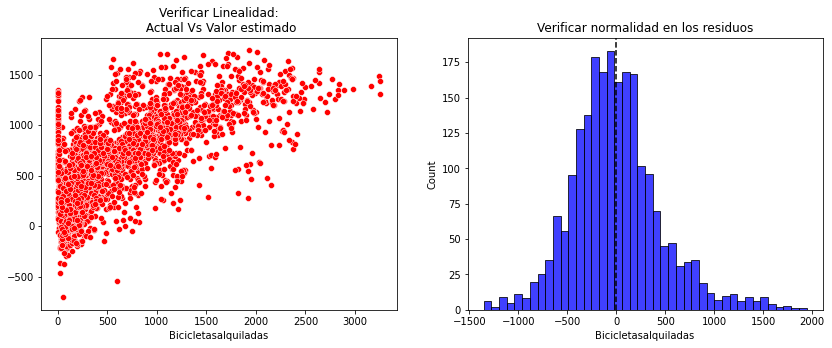

In [92]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_ml,ax=ax,color='r')
ax.set_title('Verificar Linealidad:\n Actual Vs Valor estimado')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_ml),ax=ax,color='b')
ax.axvline((y_test - y_pred_ml).mean(),color='k',linestyle='--')
ax.set_title('Verificar normalidad en los residuos')

En las graficas superiores podemos ver la linealidad de los valores estimados y los actuales y como los residuos tienen tienden a una distribución normal.

<h2>Modelo de regresión logistica multi-variable</h2>

El modelo de regresión lineal no pudo explicar las variaciones. Vamos a transformar los datos para detectar altas de mandas y verificar si el modelo se puede ajustar. Nosotros vamos a interpretar una alta demanda al sistema cuando el alquiler supera la media de alquileres.

In [93]:
df['Bicicletasalquiladas'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Bicicletasalquiladas, dtype: float64

Creamos una nueva columna llamada AltaDemanda, donde tiene el valor de 1 si el alquiler de bicicletas es igual o mayor a la media y 0 si es menor.

In [94]:
df['AltaDemanda'] = np.where(df['Bicicletasalquiladas']>=df['Bicicletasalquiladas'].mean(), 1,0)
df['AltaDemanda'].describe()

count    8760.000000
mean        0.402055
std         0.490341
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: AltaDemanda, dtype: float64

Adaptamos los datos de entrenamiento y pruebas para que la variable a predecir sea AltaDemanda

In [95]:
X = df[['Hora', 'Temperatura(C)',
       'Humedad(%)', 'Velocidaddelviento(m/s)', 'Visibilidad(10 m)',
       'Temperaturadelpuntoderocio(C)', 'Radiacionsolar(MJ/m2)',
       'Precipitaciones(mm)', 'nevadas(cm)']] # Independet variable
y = df['AltaDemanda'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=23)

print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)


(6570,) (6570, 9)
(2190,) (2190, 9)


In [96]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.intercept_, log_reg.coef_)

[-0.02576404] [[ 1.25172755e-01  2.87264611e-02 -4.92591549e-02 -8.24767671e-02
  -3.70708809e-05  1.13786125e-01  3.56536380e-01 -1.43844185e+00
  -2.01885169e-01]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [97]:
y_pred_ml = log_reg.predict(X_test)

J_mse_sk = mean_squared_error(y_pred_ml, y_test)

# R_square
R_square_ml = log_reg.score(X_test,y_test)

print('El valor de MSE es: ',J_mse_sk)
print('El R^2 obtenido por scikit learn es :',R_square_ml)

El valor de MSE es:  0.1689497716894977
El R^2 obtenido por scikit learn es : 0.8310502283105022


Utilizando el valor de R^2 podemos apreciar que el modelo explica el 83.10% de las variaciones. Mucho mejor que nuestro modelo anterior.

Text(0.5, 1.0, 'Verificar normalidad en los residuos')

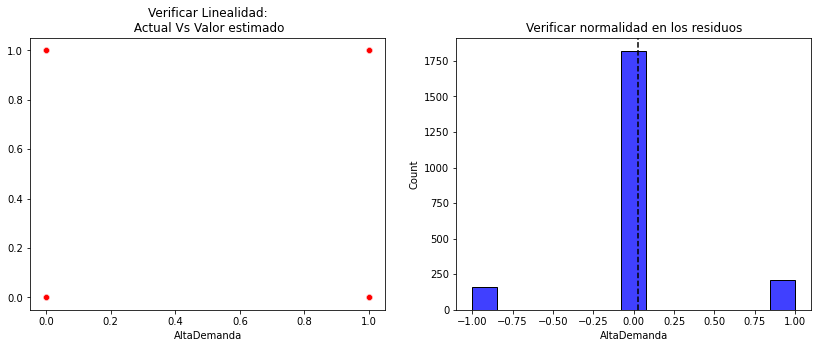

In [98]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_ml,ax=ax,color='r')
ax.set_title('Verificar Linealidad:\n Actual Vs Valor estimado')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_ml),ax=ax,color='b')
ax.axvline((y_test - y_pred_ml).mean(),color='k',linestyle='--')
ax.set_title('Verificar normalidad en los residuos')

<h1>Próximos pasos</h1>
<ul>
<li>¿Qué acciones podemos tomar para mejorar el modelo de predicción?</li>
<li>¿Cómo tomador de decisiones, que recomendaciones puedes dar con la información que te da el modelo?</li></ul>